<a href="https://colab.research.google.com/github/BrandonJChan/301FinalProject/blob/master/Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd

In [0]:
viz_dir = 'https://github.com/BrandonJChan/301FinalProject/blob/master/Visualizations/'
def display_image(filename):
  response = requests.get(viz_dir + filename + '?raw=true')
  return Image.open(BytesIO(response.content))

In [0]:
data_dir = 'https://github.com/BrandonJChan/301FinalProject/blob/master/Data/'

#**Predicting My Enjoyment of a Song**

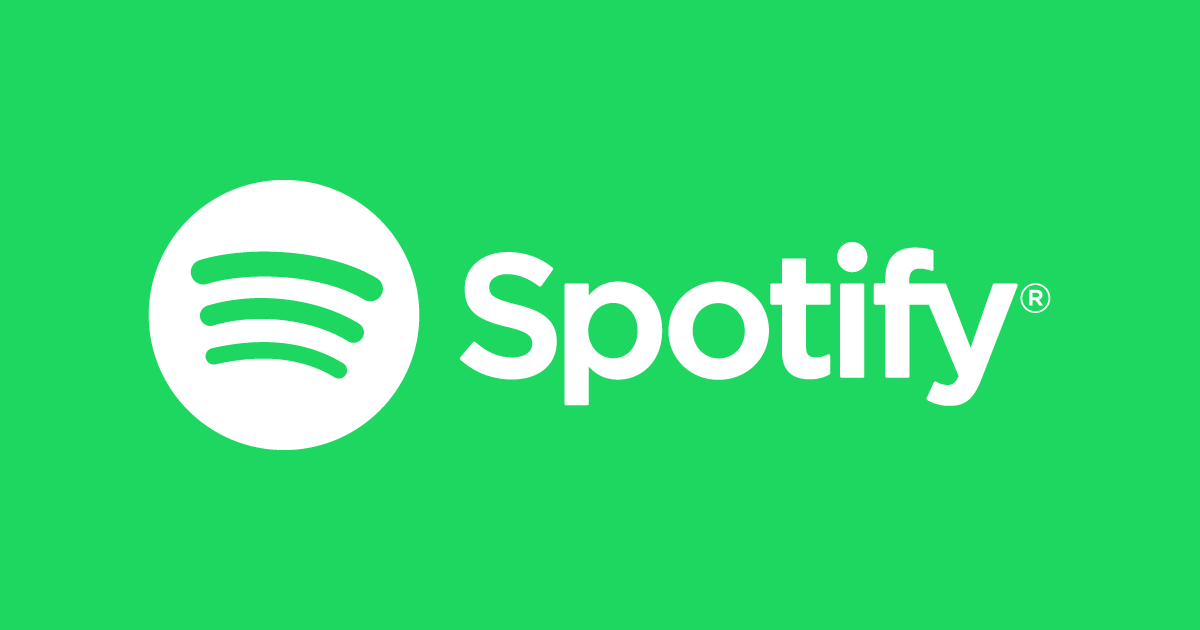

In [0]:
display_image('spotify%20logo.png')

##**Step 1: The Data**
##The Training Set

Started with my Summer 2019 streaming history. This is every single song I listened to from June 6, 2019 to September 4, 2019, when I listened to the song, and how long I listened to the song for.

In [0]:
pd.read_json('https://github.com/BrandonJChan/301FinalProject/blob/master/Data/StreamingHistory.json?raw=true')

,endTime,artistName,trackName,msPlayed
0,2019-05-18 04:18,Seven Lions,A Way To Say Goodbye,131564
1,2019-06-06 00:03,Travis Scott,Pornography,231826
2,2019-06-06 00:11,Travis Scott,Oh My Dis Side (feat. Quavo),351253
3,2019-06-06 00:19,Travis Scott,3500 (feat. Future & 2 Chainz),349092
4,2019-06-06 00:23,Travis Scott,Wasted (feat. Juicy J),235680
...,...,...,...,...
16497,2019-09-04 23:13,Bas,Jollof Rice (with EARTHGANG),128139
16498,2019-09-04 23:16,Bas,Fried Rice (with JID),175693
16499,2019-09-04 23:19,Bas,Nirvana (with Falcons & B. Lewis),165953
16500,2019-09-04 23:22,Bas,Amnesia (with Ari Lennox & Kiddominant),173464


Aggregated by song to get the total amount of time spend listening to every song.

In [0]:
pd.read_csv(data_dir + 'streaming_totals.csv' + '?raw=true')

,trackName,artistName,msPlayed
0,Say It (feat. Tove Lo),Flume,15502360
1,Freudian,Daniel Caesar,11709180
2,Feel Good (feat. Daya),Gryffin,10724803
3,Never Be Like You (feat. Kai),Flume,8174487
4,Get You (feat. Kali Uchis),Daniel Caesar,7469173
...,...,...,...
5036,Dancing With Our Hands Tied,Taylor Swift,1031
5037,Voices,Saosin,1021
5038,Come Here,Sabrina Claudio,1020
5039,Basement,DJ Mamba,1011


Now I want the audio features of these songs. This is where the Spotify Web API comes in.

First, I need to get the unique Spotify ID for every song by using the search endpoint. I will also use this endpoint to extract whether or not each song is explicit and the popularity of each song. These will be potential features for the model.

In [0]:
pd.read_csv(data_dir + 'songs_with_ids.csv' + '?raw=true')

,trackName,artistName,explicit,popularity,id
0,Say It (feat. Tove Lo),Flume,1,62,5aOpzm8W8zysk4asB9hxJw
1,Freudian,Daniel Caesar,1,54,4nESnAOALHmxg8UFCCtXhO
2,Feel Good (feat. Daya),Gryffin,0,72,0Ev562zA4pmUsBqjxsxxdx
3,Never Be Like You (feat. Kai),Flume,1,68,5WI2ltQIdwgzf1SNE76JyR
4,Get You (feat. Kali Uchis),Daniel Caesar,0,76,7zFXmv6vqI4qOt4yGf3jYZ
...,...,...,...,...,...
4980,Prescription/Oxymoron,ScHoolboy Q,1,44,3ljBzccXOpkHcGejRzHVjK
4981,Dancing With Our Hands Tied,Taylor Swift,0,63,7I7JbDv63ZJJsSi24DyJrz
4982,Voices,Saosin,0,53,71U9X93wy4BQGyvmjFqApv
4983,Come Here,Sabrina Claudio,0,49,4BTMGOsnbzI76XYTxAn5K8


Next, I plug all of the IDs into the audio features endpoint to get the audio features of every song. The audio features are measurements based on how a song sounds. The audio features I'm interested in and how they're measured are:
*   Danceability - rhythm, tempo, beat strength, overall regularity.
*   Energy - intensity and activity
*   Key - estimated overall key of a track
*   Loudness - decibels averaged across the entire track
*   Speechiness - presence of spoken word
*   Acousticness - how acoustic a track sounds
*   Instrumentallness - how prevalent vocals are in a track
*   Liveness - presence of a live audience
*   Valence - musical positiveness
*   Tempo - estimated beats per minute

In [0]:
pd.read_csv(data_dir + 'final.csv' + '?raw=true')

,trackName,artistName,msPlayed,duration_ms,plays,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Say It (feat. Tove Lo),Flume,15502360,262521,59.051885,1,62,0.598,0.532,3,-6.833,0,0.0295,0.066800,0.000003,0.0617,0.2610,74.963,4
1,Freudian,Daniel Caesar,11709180,602297,19.440874,1,54,0.355,0.298,8,-12.277,1,0.0581,0.310000,0.002660,0.1850,0.0714,115.823,3
2,Feel Good (feat. Daya),Gryffin,10724803,248156,43.217988,0,72,0.625,0.707,2,-4.761,1,0.0337,0.220000,0.000000,0.2130,0.4790,138.064,4
3,Never Be Like You (feat. Kai),Flume,8174487,234910,34.798378,1,68,0.444,0.557,0,-5.476,1,0.0602,0.453000,0.000000,0.1520,0.2960,115.058,4
4,Get You (feat. Kali Uchis),Daniel Caesar,7469173,278180,26.850144,0,76,0.658,0.294,4,-8.533,0,0.0321,0.422000,0.000052,0.0749,0.3580,74.038,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,Prescription/Oxymoron,ScHoolboy Q,1032,429667,0.002402,1,44,0.531,0.910,11,-5.397,0,0.4350,0.049500,0.008720,0.1050,0.3760,119.997,4
4741,Dancing With Our Hands Tied,Taylor Swift,1031,211507,0.004875,0,63,0.624,0.691,0,-6.686,0,0.1960,0.060400,0.000011,0.1380,0.2840,160.024,4
4742,Voices,Saosin,1021,217525,0.004694,0,53,0.307,0.925,9,-3.918,0,0.0926,0.000094,0.009250,0.3770,0.2610,179.962,4
4743,Come Here,Sabrina Claudio,1020,242011,0.004215,0,49,0.551,0.517,11,-8.605,0,0.0499,0.826000,0.006590,0.3910,0.1990,140.020,4


With the audio features API request, I was also able to get every song's song length. With that I created my response variable of interest by dividing the total time listened to a song by the song's length to approximate the number of plays. I did this because I want to adjust for the fact that some songs are longer and some songs are shorter. I see plays as a more representative measurement of how much I enjoy a song.

For clarification, I am not interested in the number of plays itself, I am simply using plays as a comparitive measure of how much I'll enjoy a song.

##The Testing Set
The set of songs I will be making predictions on are the songs from my "Release Radar" playlist. The personalized playlist of recently released songs. I will predict how much the model predicts I will enjoy these songs and compare it to my actual enjoyment of the songs.

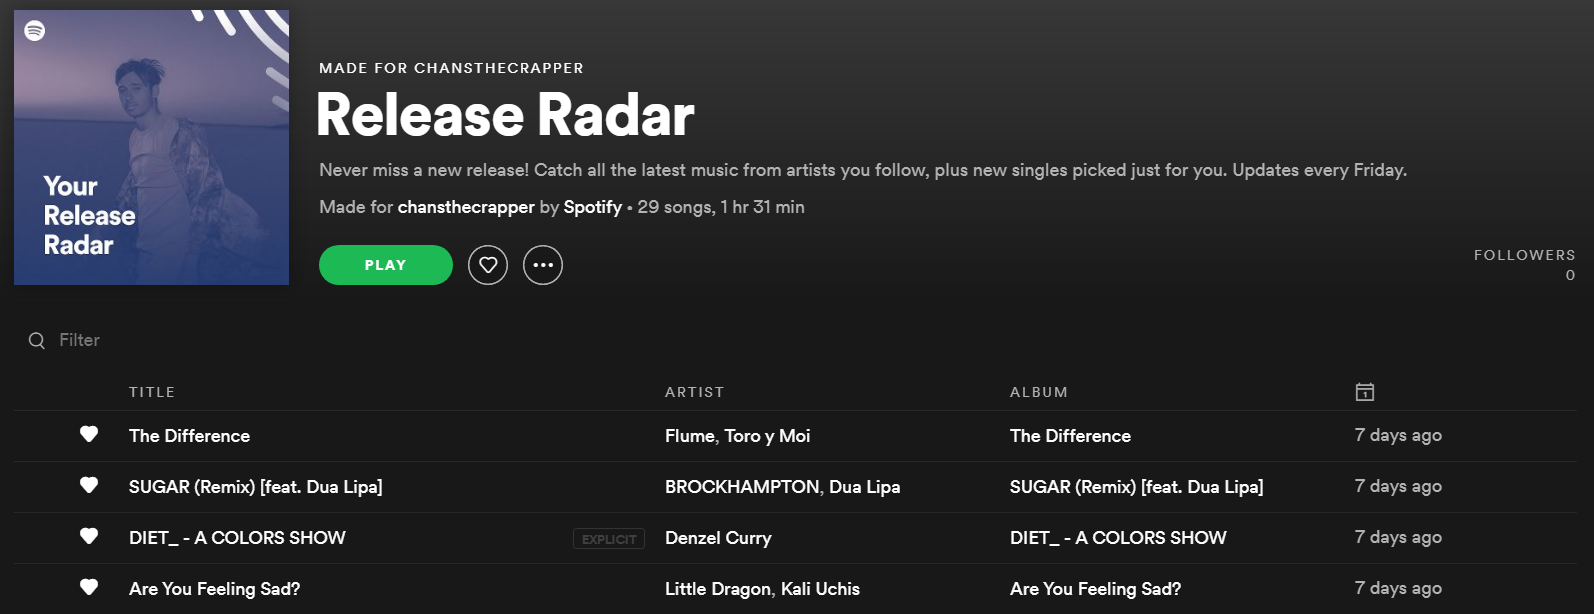

In [0]:
display_image('release_radar.PNG')

I got the songs and features of these songs by using the Spotify Web API and this playlist's unique ID to get all the songs, their IDs, and their audio features.

In [0]:
pd.read_csv(data_dir + 'final_test.csv' + '?raw=true')

,trackName,artistName,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,The Difference,Flume,0,72,0.560,0.865,1,-1.148,1,0.0909,0.25500,0.000153,0.0830,0.424,159.960,4
1,SUGAR (Remix) [feat. Dua Lipa],BROCKHAMPTON,0,75,0.661,0.523,8,-5.902,1,0.0381,0.48300,0.000000,0.4690,0.536,122.948,4
2,DIET_ - A COLORS SHOW,Denzel Curry,1,53,0.799,0.614,1,-10.165,1,0.5250,0.05210,0.000000,0.3670,0.844,90.880,4
3,Are You Feeling Sad?,Little Dragon,0,64,0.767,0.646,5,-8.612,0,0.0424,0.06160,0.000058,0.3330,0.462,113.006,4
4,FUN! - SILO x Martin Wave Remix,Vince Staples,0,51,0.766,0.898,10,-4.193,0,0.0561,0.02930,0.000336,0.0900,0.580,101.019,4
5,Don't Slack (from Trolls World Tour),Anderson .Paak,0,65,0.617,0.837,9,-5.574,1,0.1150,0.08420,0.000000,0.3440,0.800,168.120,4
6,Trapped In,REASON,1,49,0.739,0.626,1,-7.814,1,0.3410,0.02310,0.000000,0.1070,0.359,145.917,4
7,Something Comforting,Porter Robinson,0,65,0.470,0.560,8,-9.707,1,0.0298,0.04490,0.000004,0.0774,0.290,143.987,4
8,LEGACY,DPR LIVE,0,56,0.850,0.574,4,-6.253,0,0.2630,0.00735,0.000205,0.0908,0.243,149.980,4
9,tell me tell me,m-flo loves Sik-K & eill & 向井太一,0,54,0.753,0.730,3,-4.020,1,0.1670,0.26300,0.000000,0.0576,0.788,134.985,4


##**Step 2: The Exploration**
##The Response Variable

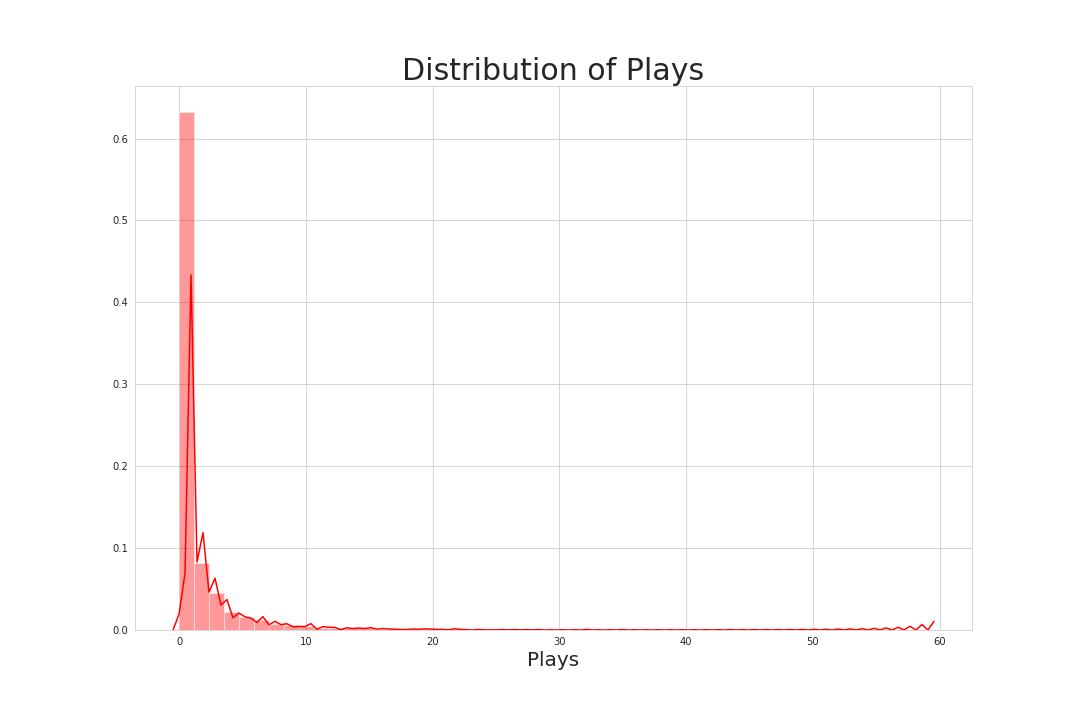

In [0]:
display_image('plays_dist.png')

From this graph, we can see that almost all of the songs I listened to are skipped after the first few seconds. There are a relatively small number of songs that I will listen to over and over again.

##The Features

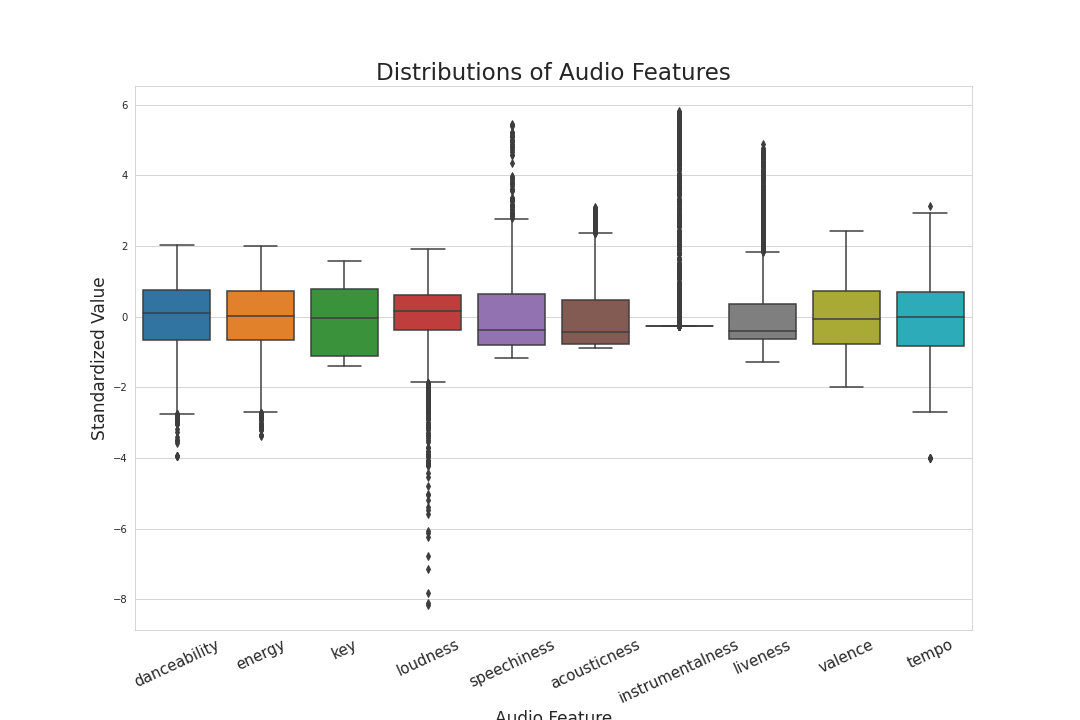

In [0]:
display_image('feat_dist.png')

This is just a plot to show the shapes of the distributions of most of the quantitative features.

Because each of the features is measured on a different scale, I standardized all the measurements so I could plot them on the same axis and just look at the shapes of their distributions.

##Feature Correlations
What we're really interested in is how these features are related to plays. irst, let's take a look at the relationship between plays and my favorite artists by seeing how plays are distributed for my most played artsits.

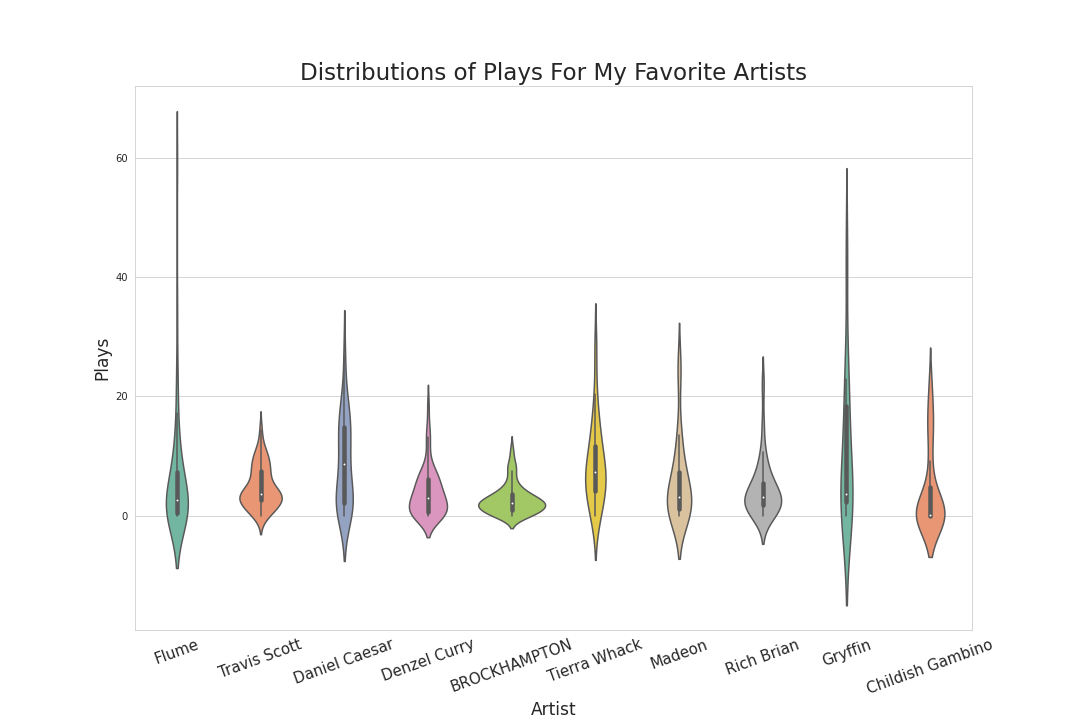

In [0]:
display_image('fav_arts_dist.png')

We can see that the distribution of plays for my favorite artists follows the same shape as the distribution of plays for all artists. Even for my favorite artists, many of their songs I only listen to several times, but there are always those few songs that I am addicted to.

Now, since there are so many quantitative features, it would be a lot to plot plays as a function of each of the quantitative features. To get a summary of those relationships, let's look at a correlation matrix.

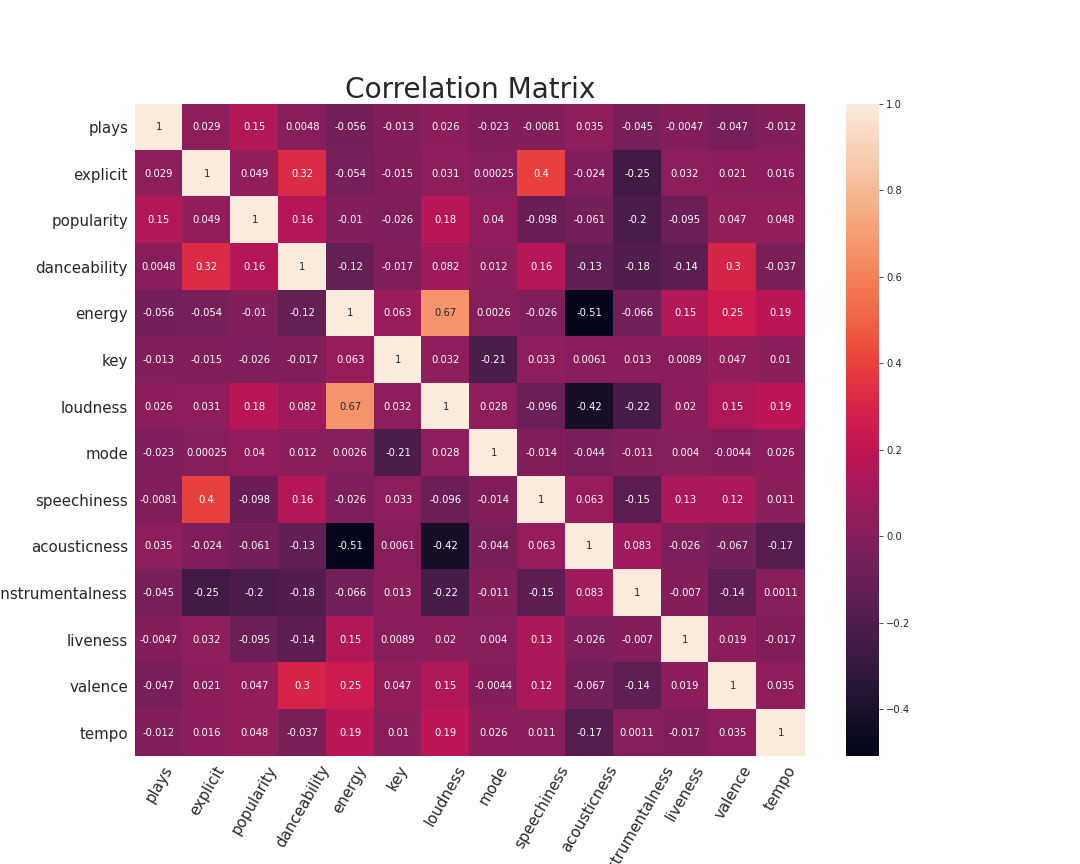

In [0]:
display_image('conf_mat.png')

This is a plot that has every variable's correlation coefficient with every other variable.

It looks like a lot's going on here, but in reality, there isn't really too much going on. There are barely any variables that are correlated with eachother. The most notable correlations are the strong positive correlation between loudness and energy along with the negative correlations between acousticness and loudness and acousticness and energy. All of the other variables are not highly correlated with each other as none of those correlations go above 0.4.

Unfortunately, plays is barely correlated with the features. Plays has the most correlation with popularity at 0.15, which is very low. This is preliminary evidence that predictions using these variables won't be too great.

Despite these findings, we will push forward!

##**Step 3: The Predictions**

##**What are we predicting?**
###Plays

##**What are our potential predictors?**

###Explicit, Popularity, Danceability, Energy, Key, Loudness, Mode, Speechiness, Acoustiness, Instrumentalness, Liveness, Valence, Tempo

First, I got rid of super extreme outliers and then I transformed quantitative variables so they followed more normal distributions.

Most importantly, I transformed the response variable, plays, doing a 0.01 power transformation because of how extremely skewed plays was. Just saying this because the MSEs will look surprisingly low.

##Trying Different Models

###1. K Nearest Neighbors
For K Nearest Neighbors, I tested seven different subsets of variables, those being:
*   Artist
*   Artist and Popularity
*   The previous two and Energy
*   The previous three and Valence
*   The previous four and Instrumentalness
*   The previous five and Acousticness
*   The previous six and Explicit

For each of the subsets, I found the best number of neighbors for each of the models.

Finally, of those best models, I chose my final K Nearest Neighbors model to be the model with the lowest MSE.

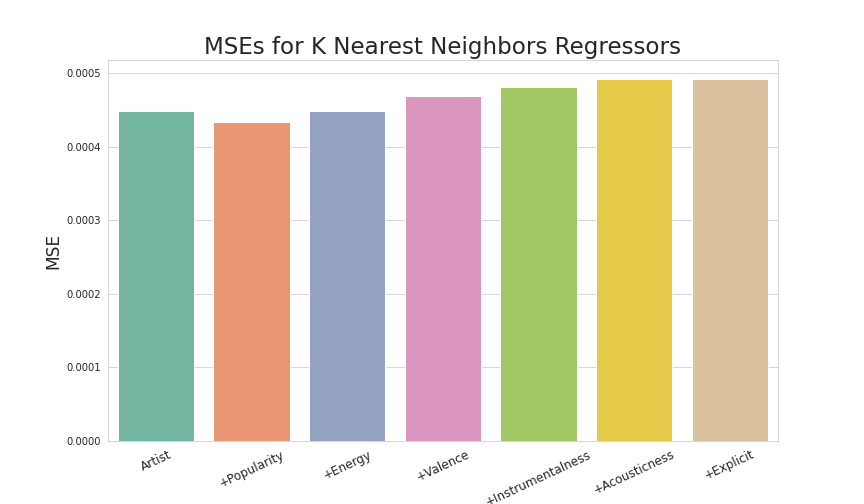

In [0]:
display_image('knn_models.png')

Here, we can see that the model with Artist and Popularity has the lowest MSE.

###**Best K Neighbors Model:**
### Features - Artist and Popularity
### Neighbors - 8
### MSE = 0.000433

I move forward assuming Artist and Popularity are the only worthwhile features based on the above analysis and because the other features are so poorly correlated with plays.

###2. Ridge Regression
I try Ridge Regression because it addresses the problem of multicollinearity or correlation between features. In this case, there is defintely correlation between the artist and how popular their songs are.

I try to find the best alpha value for the Ridge Regression model by trying multiple different alpha values.

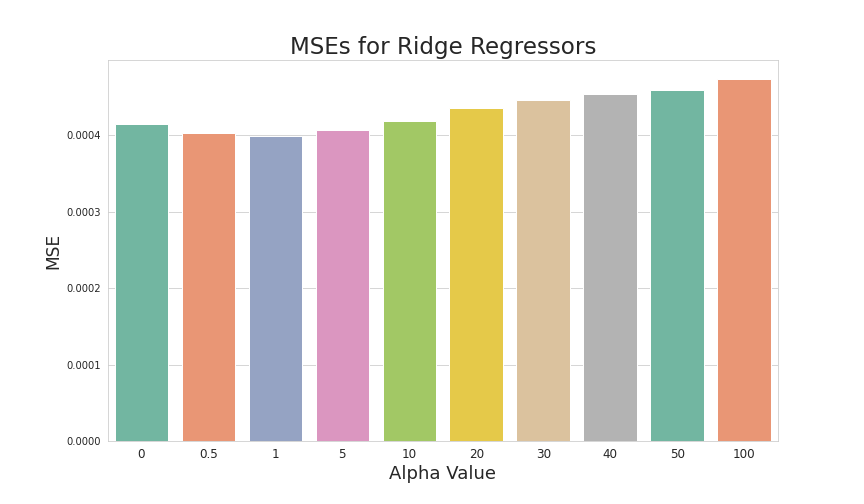

In [0]:
display_image('ridge_models.png')

Here, we see that the model with an alpha value of 1 minimizes the MSE.

###**Best Ridge Regression Model:**
### Features - Artist and Popularity
### Alpha - 1
### MSE = 0.000399

###Voting Regressor and Stacking Regressor
Finally, I using a Voting Regressor and Stacking Regressor to combine the predictions from the two best models above.

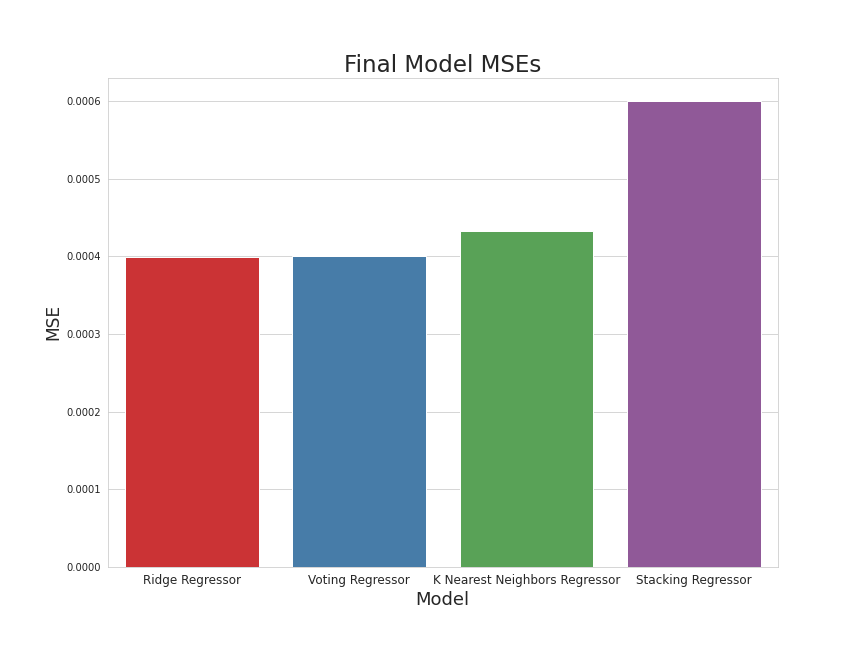

In [0]:
display_image('final_models.png')

###**Voting Regressor Model:**
### MSE = 0.000401

###**Stacking Regressor Model:**
### MSE = 0.000600

##**Winner: Ridge Regressor!**

##**FINAL PREDICTIONS**


Using the Ridge Regressor Model, I predicted the number of plays for the songs in my "Release Radar" Playlist.

In [0]:
pd.read_csv(data_dir + 'predictions.csv' + '?raw=true')

,trackName,artistName,predicted plays
0,The Difference,Flume,0.604009
1,SUGAR (Remix) [feat. Dua Lipa],BROCKHAMPTON,0.449087
2,DIET_ - A COLORS SHOW,Denzel Curry,0.474866
3,Are You Feeling Sad?,Little Dragon,0.043801
4,FUN! - SILO x Martin Wave Remix,Vince Staples,0.043347
5,Don't Slack (from Trolls World Tour),Anderson .Paak,0.227458
6,Trapped In,REASON,0.078786
7,Something Comforting,Porter Robinson,0.236059
8,LEGACY,DPR LIVE,0.069582
9,tell me tell me,m-flo loves Sik-K & eill & 向井太一,0.040739


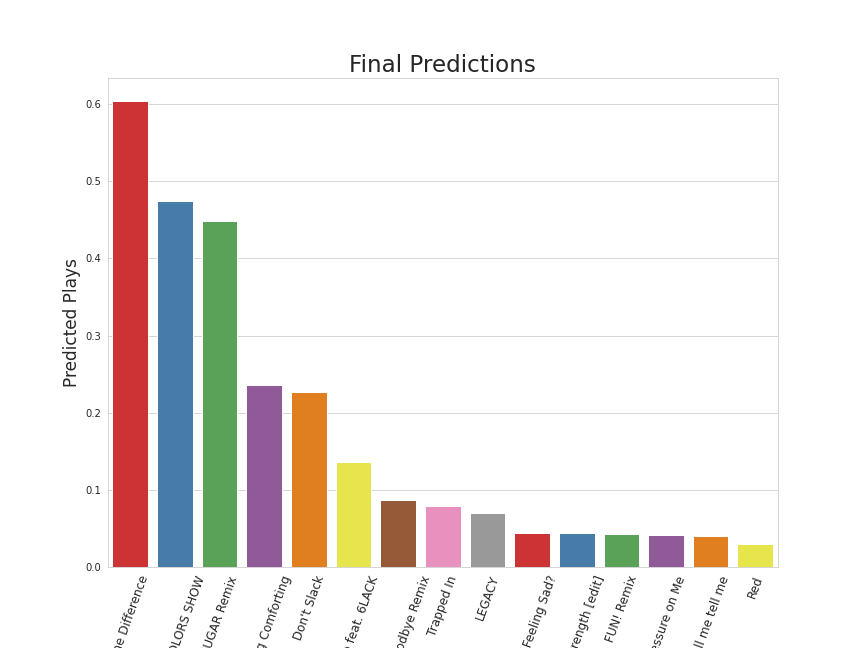

In [0]:
display_image('predictions.png')

By comparing the output above to my own experience with listening to these songs, I can conclude that the predictions are accurate but not perfect. The model is able to capture the general trends, but it fails to capture the perfect ordering of enjoyment of songs.

Going forward, I would love to fit this model to other people's streaming history as well and see how the model performs.

I would love to keep working on these predictions, trying more models and trying more features (lyrics, genres, featured artists, etc.).

#**Thank You!**